# Linear Regression with Gradient Descent

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Batch gradient descent

In [3]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

X_b = np.c_[np.ones((100,1)), X] # add the bias to each instance

$$ \text{Partial derivative of the cost function:  } \triangledown_\Theta MSE(\Theta) = \frac{2}{m}X^T.(X \cdot \Theta - y)$$

[0, 2, 0, 15]

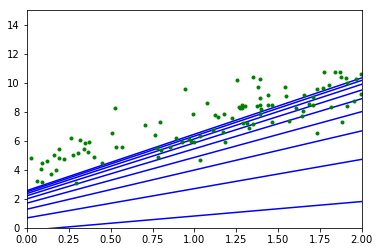

In [31]:
eta = 0.008 # learning rate
n_iterations = 100
m = 100

theta = np.random.randn(2,1) # random initialisation

thetas = []

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]



for iteration in range(n_iterations):
    
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
    if iteration % 10 == 0:
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, 'b-')

plt.plot(X, y, 'g.')
plt.axis([0,2, 0,15])

### Stochastic gradient descent

[[ 0.00529616]]
[[ 0.03533138]]
[[ 0.01473701]]
[[ 0.00924649]]
[[ 0.00673585]]


[0, 2, 0, 15]

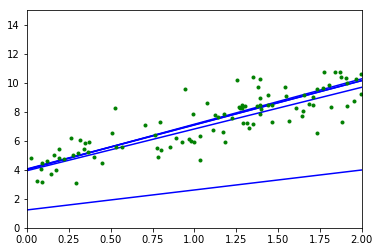

In [47]:
n_epochs = 10
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialisation

for epoch in range(n_epochs):
    
    if epoch % 2 == 0:
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, 'b-')
        print(eta)
    
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m - yi)
        theta = theta - eta * gradients

plt.plot(X, y, 'g.')
plt.axis([0,2, 0,15])

In [55]:
# in Sklearn code
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel()), sgd_reg.intercept_, 

(SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
        fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
        loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
        power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
        warm_start=False), array([ 4.12779346]), array([ 2.86020005]))

array([ 4.12779346])